### Реализовать обучение линейной регрессии для задачи boston house prices (https://www.kaggle.com/vikrishnan/boston-house-prices) с использованием torch’а

In [33]:

import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import TensorDataset, DataLoader

from matplotlib import colors, pyplot as plt
%matplotlib inline

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
y=df.MEDV
X=df.drop(['MEDV'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)


In [6]:
y_test.shape

(167,)

In [25]:
batch_size = 64
features_train = torch.FloatTensor(X_train)
labels_train = torch.FloatTensor(np.array(y_train))
train_dataset = TensorDataset(features_train, labels_train)
# Randomly reading mini-batches
train = DataLoader(train_dataset, batch_size, shuffle=True)
features_test = torch.FloatTensor(X_test)
labels_test = torch.FloatTensor(np.array(y_test))


In [26]:
model = torch.nn.Sequential(torch.nn.Linear(13, 1))

In [27]:
model

Sequential(
  (0): Linear(in_features=13, out_features=1, bias=True)
)

In [28]:
loss = torch.nn.MSELoss(reduction='mean')

In [29]:
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

In [30]:


num_epochs = 3000
train_losses,   test_losses = [], []
for epoch in range(0, num_epochs):

    model.train()
    for X, y in train:
        trainer.zero_grad()
        l = loss(model.forward(X).reshape(-1), y)
        l.backward()
        trainer.step()

    model.eval()
    train_loss =   loss(model.forward(features_train).reshape(-1), labels_train).item()
    test_loss = loss(model.forward(features_test).reshape(-1), labels_test).item()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    if epoch%100==0:
        print('epoch %d:  train_loss: %f' % (epoch, train_loss),' test_loss: %f' % ( test_loss))


epoch 0:  train_loss: 568.986755  test_loss: 585.638062
epoch 100:  train_loss: 69.592918  test_loss: 77.196129
epoch 200:  train_loss: 27.299252  test_loss: 31.135532
epoch 300:  train_loss: 23.237986  test_loss: 25.961306
epoch 400:  train_loss: 22.669451  test_loss: 25.002119
epoch 500:  train_loss: 22.478048  test_loss: 24.740974
epoch 600:  train_loss: 22.358112  test_loss: 24.582493
epoch 700:  train_loss: 22.267805  test_loss: 24.532248
epoch 800:  train_loss: 22.201096  test_loss: 24.401796
epoch 900:  train_loss: 22.148819  test_loss: 24.393387
epoch 1000:  train_loss: 22.108744  test_loss: 24.336481
epoch 1100:  train_loss: 22.075899  test_loss: 24.283716
epoch 1200:  train_loss: 22.053576  test_loss: 24.294676
epoch 1300:  train_loss: 22.033173  test_loss: 24.292776
epoch 1400:  train_loss: 22.016785  test_loss: 24.236996
epoch 1500:  train_loss: 22.006643  test_loss: 24.229519
epoch 1600:  train_loss: 21.994757  test_loss: 24.207521
epoch 1700:  train_loss: 21.985559  test_

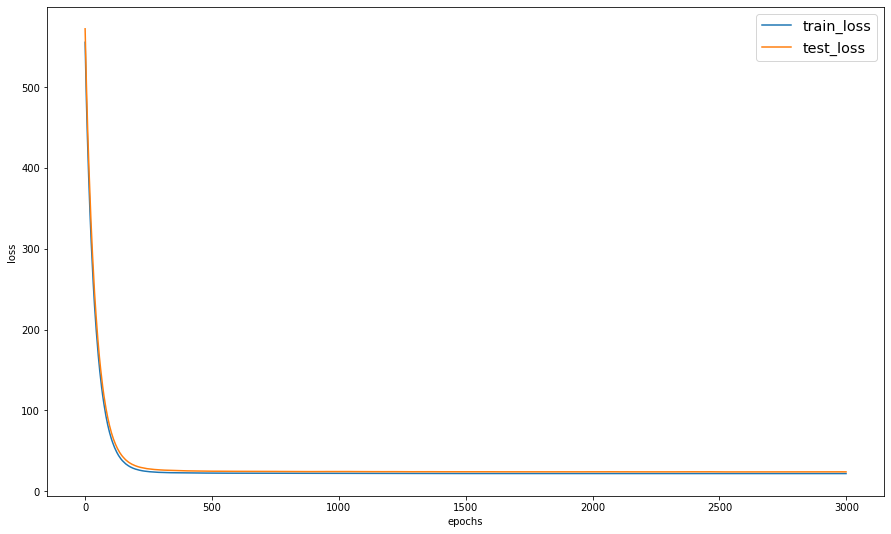

In [23]:
plt.figure(figsize=(15, 9))
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses , label="test_loss")
plt.legend(loc='best', fontsize='x-large')
plt.xlabel("epochs")
plt.ylabel("loss")

plt.show()

In [32]:
print('w', model[0].weight.data)
print('b', model[0].bias.data)

w tensor([[-0.8817,  0.5815, -0.0315,  0.7831, -2.2947,  3.4838, -0.4167, -2.9006,
          2.2297, -1.6788, -1.9988,  0.7727, -2.6615]])
b tensor([22.3950])
